C:\Users\USER\AppData\Local\Temp\ipykernel_11804\1762005064.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


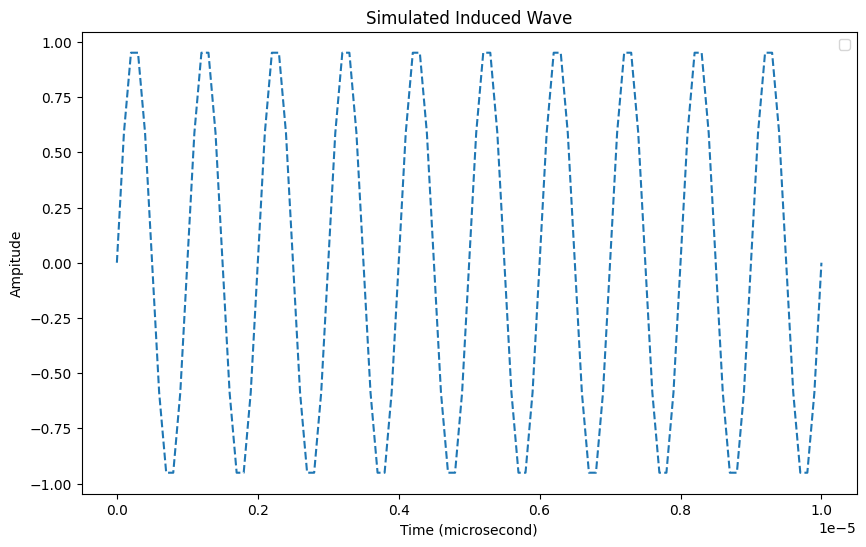

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

#at this stage we want to create a wave so what we first do is create 
#an a array with the time values with equal interval length between 0 and the time 
#Divide the time period by the 1/sampling rate
#define the sampling rate as the hz that we want to sample at 
#we must use a sampling rate at least 2x the max frequency in the data
#max frequency is 1e6 so from 2 to 3 would be good following the nyquistic theorem
sampling_rate = 10e6 #this is the 5MHZ ....the e symbol means exponent 
duration = 10e-6 #1 microsecond 
time_array = np.arange(0,duration,1/sampling_rate)
#the above function creates a sorted array of values between 
# 0 and 1 millisecond and these are divide by the 1/ sampling_rate
#after we have created the time array we now create a defect free sine wave simulation
#so our formular is that we shall take the the formular so sine and multiply by each value in the time array 
#this shall get us the sine value at each point
#the function for the sine wave is y=a*sin⁡(2 * pi * b.x)
# a is Amplitude ,b is Frequency or Angular fx
# x represents time or position 
#think of bx as  a measure of how the wave repeats its angle or position after time
# if the is + c is the c will represent phase shift 
#the values we need here are frequency 
frequency = 1e6 #1 MHz frequency 
amplitude = 1e6 #this is 1 MPa in Pascals
pulse = np.sin(2 * np.pi * frequency * time_array)
#this the pulse to be pushed out 
#display the pulse graphically 

plt.figure(figsize=(10,6))
plt.plot(time_array,pulse,'--')
plt.xlabel("Time (microsecond)")
plt.ylabel('Ampitude')
plt.title("Simulated Induced Wave")
plt.legend()
plt.show()

In [2]:
#perfoming fast fourier Transform on the wave to put in the frequency domain
from scipy.fft import fft
from scipy.stats import skew,kurtosis
#create a function that extracts the most important features from the data
def extract_features(signal,sampling_rate):
    #Time-domain features 
    max_amplitude = np.max(np.abs(signal))
    #root mean squared value
    #this is a measure of the signals magnitude power or energy
    #single number that represents the effective value of the signal 
    rms_value = np.sqrt(np.mean(signal**2))
    
    #Frequency domain features 
    N = len(signal)
    fft_result = fft(signal)
    freqs =np.fft.fftfreq(N,1/sampling_rate)
    fft_magnitude =np.abs(fft_result)
    #what we have done here is to calculate the number of samples in the signal using n
    #converted the signal from it time-domain represenation into frequency domain-representation
    #generate the frequencies basing of the FFT results of each sampling point
    #compute the absolute value of the power or strength at each sampling point
    
    dominant_freq = freqs[np.argmax(fft_magnitude[:N//2])]
#what this does is it first divides the fft_magnitude array by since its redudant
#np.argmax will return the index of the frequency component with the highest amplitude
#using that index the corresponding frequency is fetched which is the most dominant 


     # Statistical features
    mean_val = np.mean(signal)
    variance_val = np.var(signal)
    skewness_val = skew(signal)
    kurtosis_val = kurtosis(signal)
    
    return {
        'Max Amplitude': max_amplitude,
        'RMS': rms_value,
        'Dominant Frequency': dominant_freq,
        'Mean': mean_val,
        'Variance': variance_val,
        'Skewness': skewness_val,
        'Kurtosis': kurtosis_val
    }



In [4]:
#We want to create a function that makes a signal that contains defects and is an echo of the previous signal
''' Differences in Parameters Between an Induced Signal and Its Echo (Defective vs. Defect-Free):
Max Amplitude:

Defect-Free: The echo’s amplitude is typically lower than the induced signal due to reflection losses (material interaction).
Defective: Defects usually absorb more energy, leading to an even lower amplitude compared to the defect-free case.
Root Mean Squared (RMS) Value:

Defect-Free: Similar to amplitude, the RMS value would be slightly lower in the echo compared to the original.
Defective: With a defect, the RMS value would drop more significantly because the energy dissipates unevenly when reflected from a defect.
Dominant Frequency:

Defect-Free: The frequency content of the echo would typically be close to the original transmitted signal, but with some shifts due to noise and material properties.
Defective: A defect can cause scattering and attenuation at different frequencies, leading to a shift in the dominant frequency or introducing extra noise in the frequency domain.
Statistical Features (Mean, Variance, Skewness, Kurtosis):

Defect-Free: These parameters would be slightly altered in the echo due to signal degradation over time and distance.
Defective: These parameters can be significantly different, especially if the defect introduces asymmetry (affecting skewness), or alters the tails of the signal’s distribution (affecting kurtosis).
'''
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import fftconvolve

def simulate_echo(signal,sampling_rate,defective=False,delay_time =0.001,attenuation_factor =0.6):
    """
    Simulates an echo of the input signal, with options for defect-free or defective reflection.
    
    Parameters:
        signal: The original transmitted signal
        sampling_rate: Sampling rate of the signal (Hz)
        defective: If True, simulate the echo as if there's a defect
        delay_time: Delay (in seconds) between the signal and its echo
        attenuation_factor: The amount by which the amplitude of the echo is attenuated
    
    Returns:
        echo_signal: The simulated echo signal
    """

    #lets delay the samples
    delayedSamples = int(sampling_rate*delay_time)
    #attenuating the original signal 
    echo_signal = np.pad(signal * attenuation_factor,(delayedSamples,0))

    if defective:
        #add noise to demonstate defect
        distortion_factor = np.random.uniform(0.5,0.8)
        noise = np.random.normal(0,0.02,len(echo_signal))
        echo_signal = fftconvolve(echo_signal, [distortion_factor], mode='same') + noise
        return echo_signal[:len(signal)]



In [10]:
echo_defect = simulate_echo(pulse,10e6,defective=True,delay_time=0.01,attenuation_factor=0.7)
echo_noDefect= simulate_echo(pulse,10e6,defective=False,delay_time=0.01,attenuation_factor=0.7)                          
                             
                             

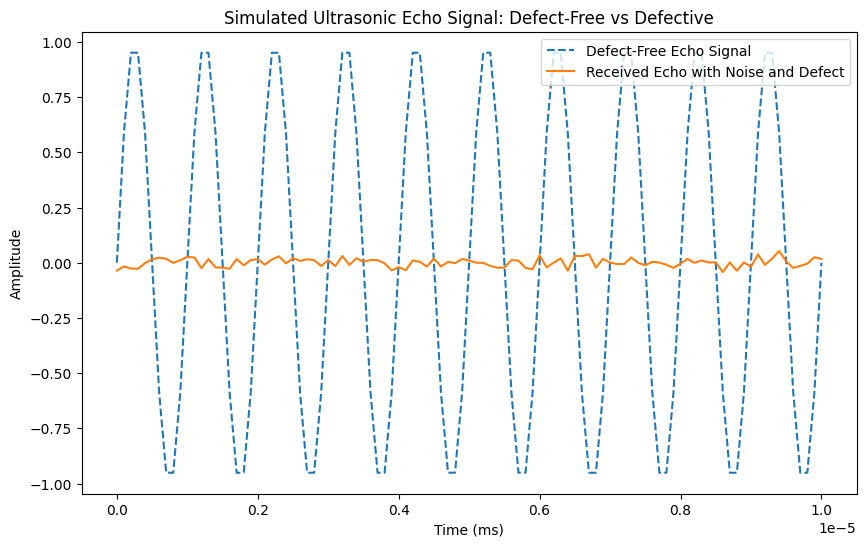

In [11]:
#display the data graphically in terms of fft to see the diffrences
plt.figure(figsize=(10, 6))
plt.plot(time_array , pulse, '--', label='Defect-Free Echo Signal')
plt.plot(time_array, echo_defect, label='Received Echo with Noise and Defect')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Simulated Ultrasonic Echo Signal: Defect-Free vs Defective')
plt.legend()
plt.show()


In [12]:
#function to calculate and display fft 

def plot_fft(signal, sampling_rate, title="FFT of Signal"):
    # Perform FFT
    N = len(signal)
    fft_result = fft(signal)
    fft_magnitude = np.abs(fft_result)  # Magnitude of FFT
    freqs = np.fft.fftfreq(N, 1 / sampling_rate)  # Frequency bins
    
    # Only plot the positive half of frequencies (real part)
    positive_freqs = freqs[:N // 2]
    positive_fft_magnitude = fft_magnitude[:N // 2]
    
    # Plot the FFT result
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freqs, positive_fft_magnitude, color='b')
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

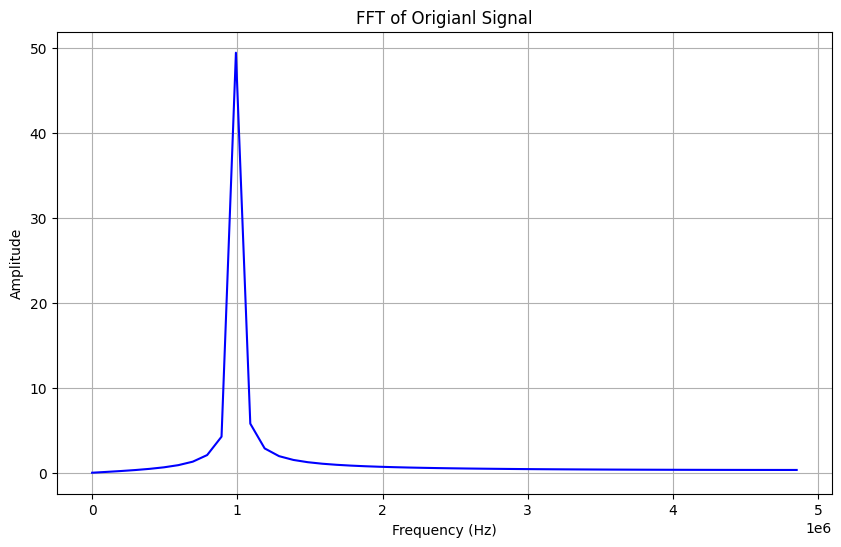

In [13]:
#first plotting the fft of the original signal
plot_fft(pulse, sampling_rate, title="FFT of Original Signal")

In [14]:
#plot fft of echo without defect
plot_fft(echo_noDefect, sampling_rate, title="FFT of NON Defective Signal")

TypeError: object of type 'NoneType' has no len()

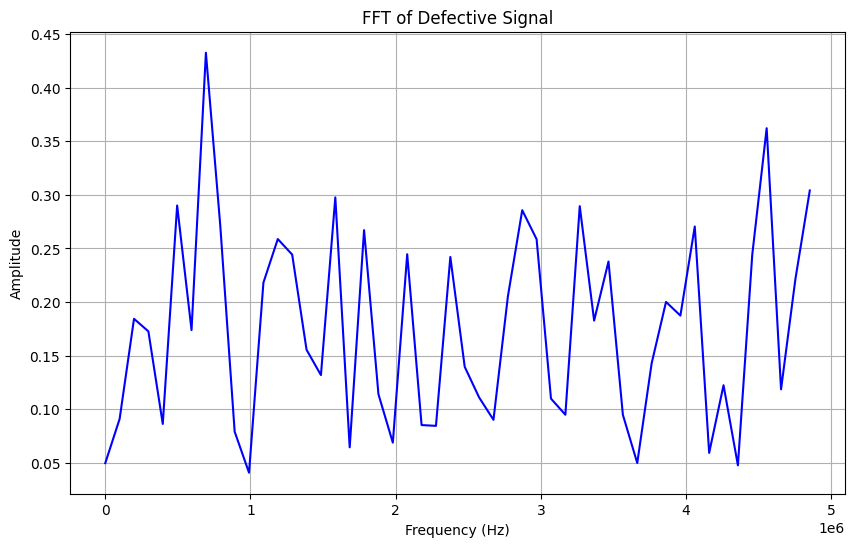

In [15]:
#defective now
plot_fft(echo_defect,sampling_rate, title="FFT of Defective Signal")

In [16]:
#it is very clear now how tell what to look for....now let us e create the model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Prepare data for the model
X = df[features].values  # Feature columns
y = df['Label'].values   # Target label

# One-hot encode the labels (if there are more than two classes)
num_classes = len(np.unique(y))  # Number of unique labels
y_categorical = to_categorical(y, num_classes)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build the Neural Network
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 64 neurons in the first layer

# Hidden layers
model.add(Dense(32, activation='relu'))  # 32 neurons in the second layer
model.add(Dense(16, activation='relu'))  # 16 neurons in the third layer

# Output layer
model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

# Step 4: Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Predict labels
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the accuracy using sklearn
accuracy_sklearn = accuracy_score(y_test_labels, y_pred_labels)
print(f"Model Accuracy (Sklearn): {accuracy_sklearn * 100:.2f}%")


NameError: name 'df' is not defined